In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
import scipy as sci
import importlib

from turtle import width
import plotly.express as px

#self created library
import plot_utils

#settings
%load_ext autoreload
%autoreload 3
%config InteractiveShell.ast_node_interactivity = 'all'
%config InlineBackend.figure_format = 'retina'



In [190]:
#figre options
# plt.rcParams['figure.dpi'] = 300
# plt.rcParams['savefig.dpi'] = 300

In [2]:
from data import credit_data_reader
df = credit_data_reader.credit_data_reader()

In [3]:
#How to clean up this mess?...
#US instrument yields
us_corp_high = df[df['name'] == df['name'].unique()[0]]
us_corp_ig = df[df['name'] == df['name'].unique()[1]]
us3 = df[df['name'] == df['name'].unique()[2]]
us5 = df[df['name'] == df['name'].unique()[3]]
us10 = df[df['name'] == df['name'].unique()[4]]
sp_tr = df[df['name'] == df['name'].unique()[5]]

#UK instrument yields
uk_corp_ig = df[df['name'] == df['name'].unique()[6]]
uk3 = df[df['name'] == df['name'].unique()[7]]
uk5 = df[df['name'] == df['name'].unique()[8]]
uk10 = df[df['name'] == df['name'].unique()[9]]
ftse_tr = df[df['name'] == df['name'].unique()[10]]

#German instrument yields
ger_tr = df[df['name'] == df['name'].unique()[11]]
ger3 = df[df['name'] == df['name'].unique()[12]]
ger5 = df[df['name'] == df['name'].unique()[13]]
ger10 = df[df['name'] == df['name'].unique()[14]]
dax = df[df['name'] == df['name'].unique()[15]]

us_corp_high = us_corp_high.drop('yield',axis=1).tail(len(us_corp_high)-181)    # remove first 181 values because they are not split evenly on a weekly basis,
us_corp_ig = us_corp_ig.drop('yield',axis=1).tail(len(us_corp_ig)-194)    # remove first 193 values because they are not split evenly on a weekly basis,
us3 = us3.drop('last_price',axis=1)
us5 = us5.drop('last_price',axis=1)
us10 = us10.drop('last_price',axis=1)
sp_tr = sp_tr.drop('yield',axis=1)

uk_corp_ig = uk_corp_ig.drop('yield',axis=1)
uk3 = uk3.drop('last_price',axis=1)
uk5 = uk5.drop('last_price',axis=1)
uk10 = uk10.drop('last_price',axis=1)
ftse_tr = ftse_tr.drop('yield',axis=1)

ger_tr = ger_tr.drop('yield',axis=1)
ger3 = ger3.drop('last_price',axis=1)
ger5 = ger5.drop('last_price',axis=1)
ger10 = ger10.drop('last_price',axis=1)
dax = dax.drop('yield',axis=1)

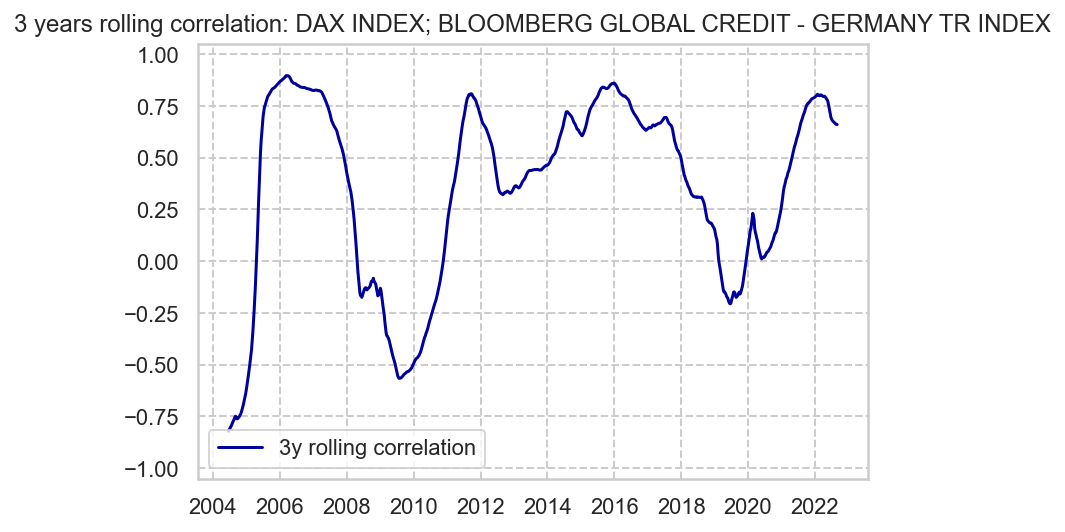

In [6]:
""" German Correlations, rolling """
weeks = 156
fig, axs = plot_utils.corr_plot_seaborn(dax, ger_tr, weeks)
# fig, axs = plot_utils.corr_plot_seaborn(dax, ger3, weeks)
# fig, axs = plot_utils.corr_plot_seaborn(dax, ger5, weeks)
# fig, axs = plot_utils.corr_plot_seaborn(dax, ger10, weeks)

# plt.savefig('bsc_plots/3y_corr_dax_gertr.eps', dpi=600)

' US Correlations, rolling '

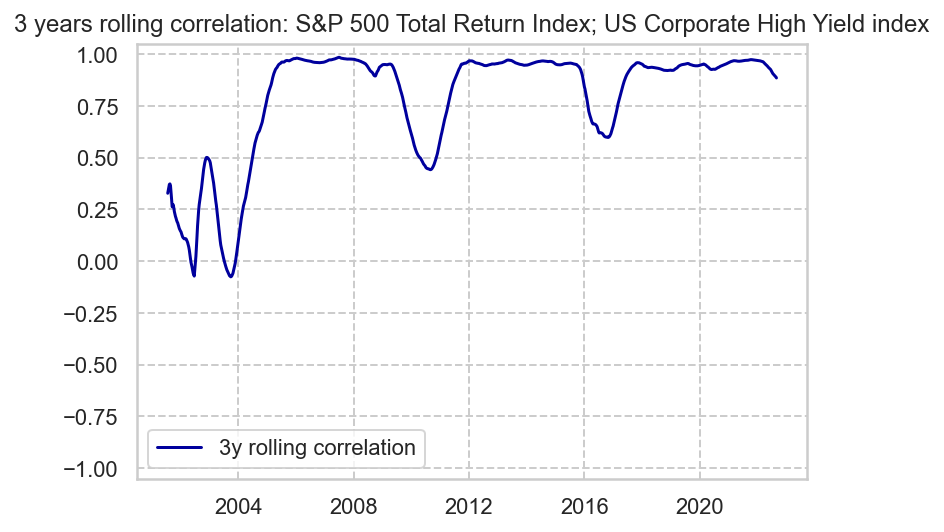

In [10]:
""" US Correlations, rolling """
weeks = 156
fig, axs = plot_utils.corr_plot_seaborn(sp_tr, us_corp_high, weeks)
# fig, axs = plot_utils.corr_plot_seaborn(sp_tr, us_corp_ig, weeks)
# fig, axs = plot_utils.corr_plot_seaborn(sp_tr, us3, weeks)
# fig, axs = plot_utils.corr_plot_seaborn(sp_tr, us5, weeks)
# fig, axs = plot_utils.corr_plot_seaborn(sp_tr, us10, weeks)

# plt.savefig('bsc_plots/3y_corr_sptr_uscorphigh.eps', dpi=600)

' UK Correlations, rolling '

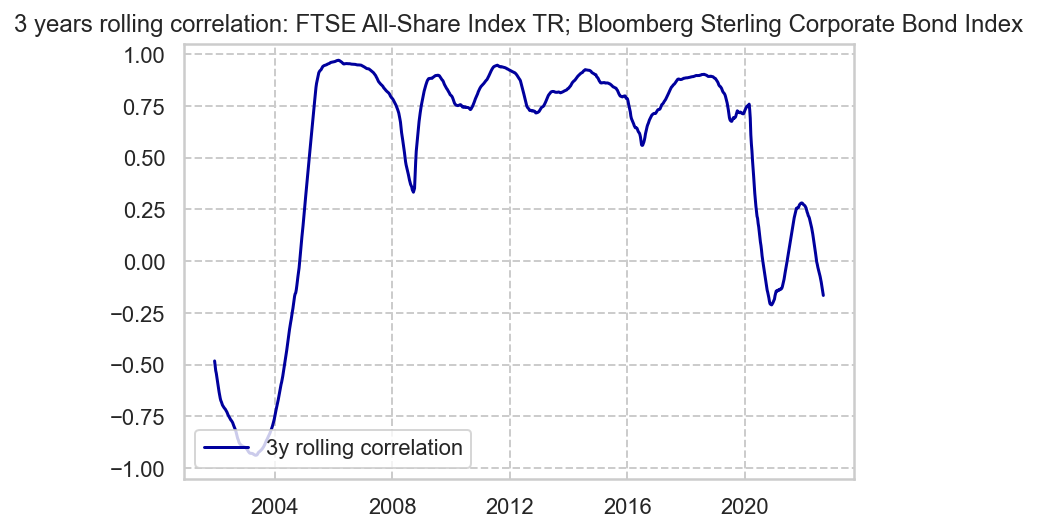

In [11]:
""" UK Correlations, rolling """
weeks = 156
fig, axs = plot_utils.corr_plot_seaborn(ftse_tr, uk_corp_ig, weeks)
# fig, axs = plot_utils.corr_plot_seaborn(ftse_tr, uk3, weeks)
# fig, axs = plot_utils.corr_plot_seaborn(ftse_tr, uk5, weeks)
# fig, axs = plot_utils.corr_plot_seaborn(ftse_tr, uk10, weeks)

# plt.savefig('bsc_plots/3y_corr_ftsetr_uk10.eps', dpi=600)

' US Returns, rolling '

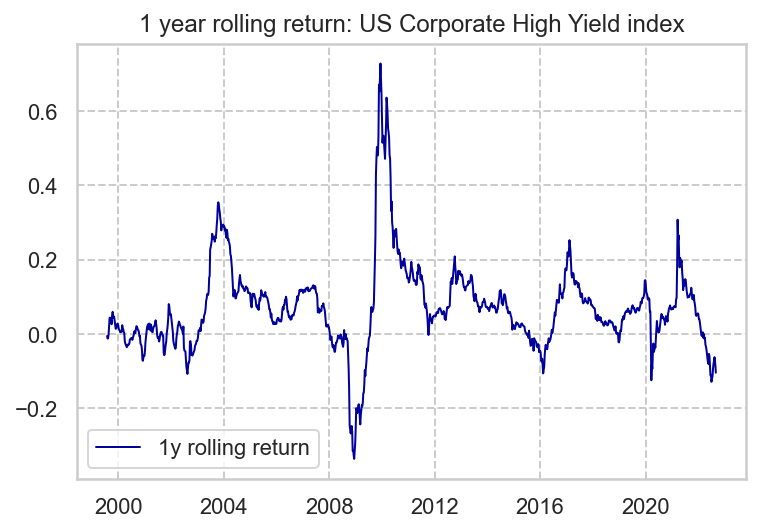

In [13]:
""" US Returns, rolling """
weeks = 52
fig, axs = plot_utils.return_plot(us_corp_high, weeks)
# fig, axs = plot_utils.return_plot(us_corp_ig, weeks)
# fig, axs = plot_utils.return_plot(sp_tr, weeks)

# plt.savefig('bsc_plots/1y_return_sptr.eps', dpi=600)

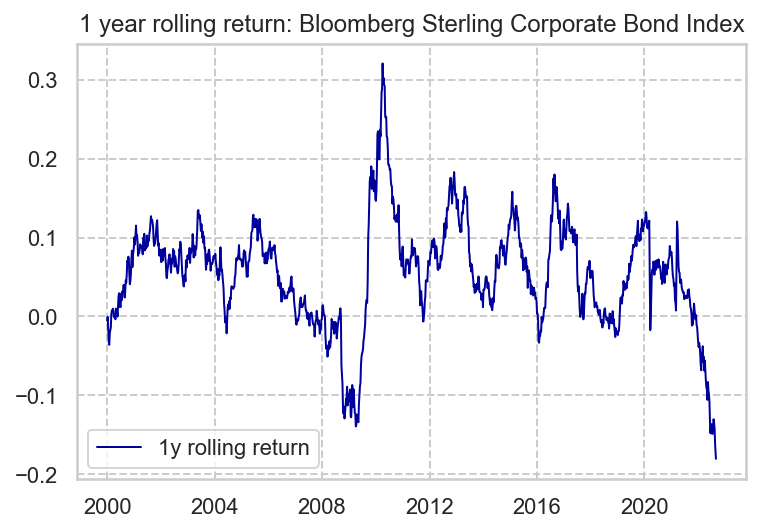

In [14]:
""" UK Returns, rolling """
weeks = 52
fig, axs = plot_utils.return_plot(uk_corp_ig, weeks)
# fig, axs = plot_utils.return_plot(ftse_tr, weeks)

# plt.savefig('bsc_plots/1y_return_ukcorpig.eps', dpi=600)

' German Returns, rolling '

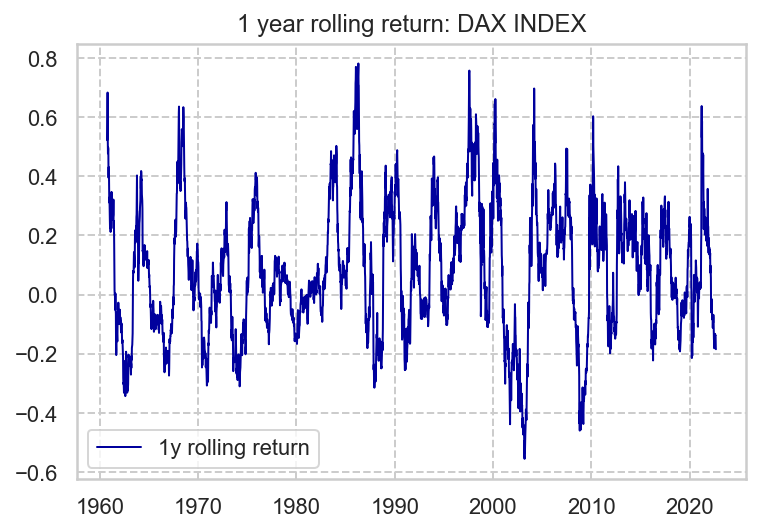

In [15]:
""" German Returns, rolling """
weeks = 52
# fig, axs = plot_utils.return_plot(ger_tr, weeks)
fig, axs = plot_utils.return_plot(dax, weeks)

# plt.savefig('bsc_plots/1y_return_dax.eps', dpi=600)

' US Sigma, rolling '

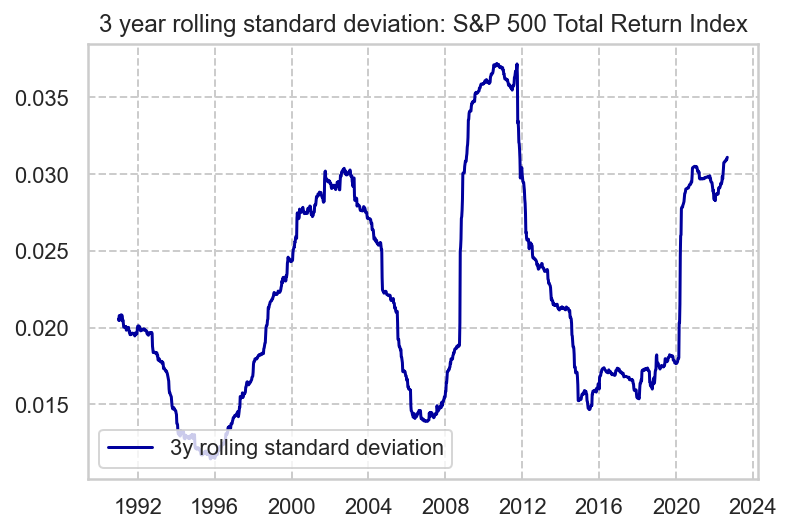

In [16]:
""" US Sigma, rolling """
weeks = 156
fig, axs = plot_utils.sigma_plot(sp_tr, weeks)
# fig, axs = plot_utils.sigma_plot(us_corp_ig, weeks)
# fig, axs = plot_utils.sigma_plot(us_corp_high, weeks)

# plt.savefig('bsc_plots/3y_sigma_sptr.eps', dpi=600)

' UK Sigma, rolling '

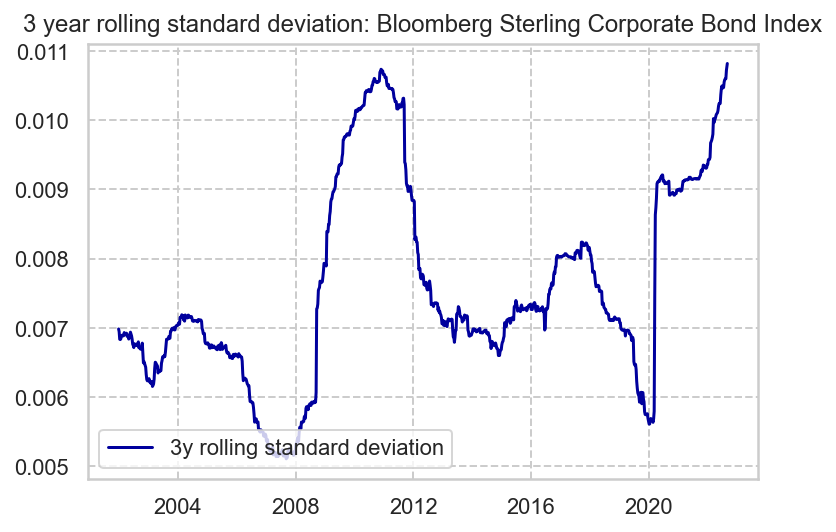

In [17]:
""" UK Sigma, rolling """
weeks = 156
# fig, axs = plot_utils.sigma_plot(ftse_tr, weeks)
fig, axs = plot_utils.sigma_plot(uk_corp_ig, weeks)

# plt.savefig('bsc_plots/3y_sigma_ftsetr.eps', dpi=600)

' German Sigma, rolling '

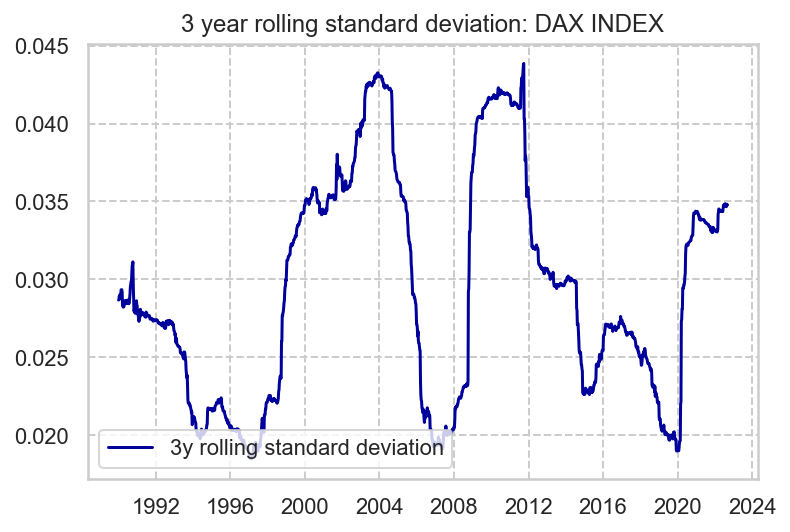

In [19]:
""" German Sigma, rolling """
weeks = 156
fig, axs = plot_utils.sigma_plot(dax, weeks)
# fig, axs = plot_utils.sigma_plot(ger_tr,weeks)

# plt.savefig('bsc_plots/3y_sigma_dax.eps', dpi=600)

<AxesSubplot:xlabel='date', ylabel='corr'>

Text(0, 0.5, '')

Text(0.5, 0, '')

(-1.05, 1.05)

<AxesSubplot:xlabel='date', ylabel='std'>

Text(0.5, 1.0, '3 years rolling correlation: DAX INDEX; GER GOVT BOND 3Y\n3 year rolling standard deviation: DAX INDEX')

Text(0, 0.5, '')

Text(0.5, 0, '')

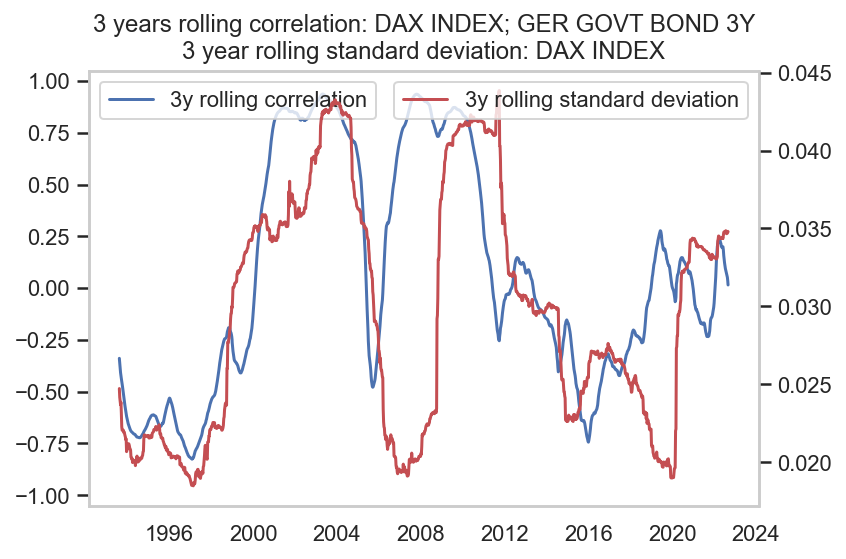

In [20]:
""" Overlap, sigma & correlation """
weeks = 156

# set 1st input series and corr length
series1 = dax
series2 = ger3
corr_length = 156

# set theme and style
sns.set_theme()
sns.set_style("whitegrid", {'grid.linestyle': ''})

# find which series is the shortest and set start date to that of the shortest series
if len(series1) > len(series2):
    tail_length = len(series2)
    start_date = series2.iloc[0]['date'] + \
        pd.to_timedelta(corr_length, unit='W')
else:
    tail_length = len(series1)
    start_date = series1.iloc[0]['date'] + \
        pd.to_timedelta(corr_length, unit='W')

# set tail length as the shortest series
series1 = series1.tail(tail_length)
series2 = series2.tail(tail_length)

series1.reset_index(inplace=True, drop=True)
series2.reset_index(inplace=True, drop=True)

# make it work for both yield and last_price columns
col_name1 = 'last_price'
col_name2 = 'last_price'
col_name = 'last_price'
if 'yield' in series1.columns:
    col_name1 = 'yield'
    col_name = 0
if 'yield' in series2.columns:
    col_name2 = 'yield'
    col_name = 0

# calc the rollling corr
corr = series1[col_name1].rolling(corr_length).corr(series2[col_name2])

# insert into dataframe, add dates and rename calucalted correlation column to corr
corr = pd.DataFrame(corr)
corr['date'] = series1['date']
corr['corr'] = corr[col_name]
corr = corr.drop(col_name, axis=1)

# cutoff to startdate
corr = corr[corr['date'] > start_date]

# auto-create 1st title
title1 = str(corr_length/52)[0:1] + ' years rolling correlation:' + \
    ' ' + series1.iloc[1, 0] + '; ' + series2.iloc[1, 0]

# create canvas
fig, axs = plt.subplots(1, 1)

# plot it
sns.lineplot(corr, y='corr', x='date', linewidth=1.5, legend=False, ax=axs)

# add legend, remove labels and adjust y-axis
plt.legend(loc='upper left', labels=['3y rolling correlation'])
plt.ylabel("")
plt.xlabel("")
plt.ylim(-1.05, 1.05)

# add second y-axis
ax2 = plt.twinx()



# ----------------------
# set 2nd series
series1 = dax

# calculate return
returns_series1 = series1['last_price'].pct_change(periods=1)

# insert into dataframe
returns_series1 = pd.DataFrame(returns_series1)

# calculate rolling returns
std_returns_series1 = returns_series1.rolling(weeks).std()

# add dates and rename column to std
std_returns_series1['date'] = series1['date']
std_returns_series1 = std_returns_series1.rename(columns={'last_price': 'std'})

# cutoff to match shortest of the 1st input
std_returns_series1 = std_returns_series1[std_returns_series1['date'] > start_date]

# plot it on second axis
sns.lineplot(std_returns_series1, x='date', y='std',
             color='r', legend=False, linewidth=1.5, ax=ax2)

# auto-create 2nd title
title2 = str(corr_length/52)[0:1] + ' year rolling standard deviation: ' + str(series1.iloc[0]['name'])

# concatinate titles and attah it to axis
title_final = title1 + '\n' + title2
axs.set_title(title_final)

# add legend, remove labels and adjust y-axis
plt.legend(loc='upper right', labels=['3y rolling standard deviation'])
plt.ylabel("")
plt.xlabel("")

# plt.savefig('bsc_plots/3y_corr_dax_ger3_sigma_dax.eps', dpi=600)

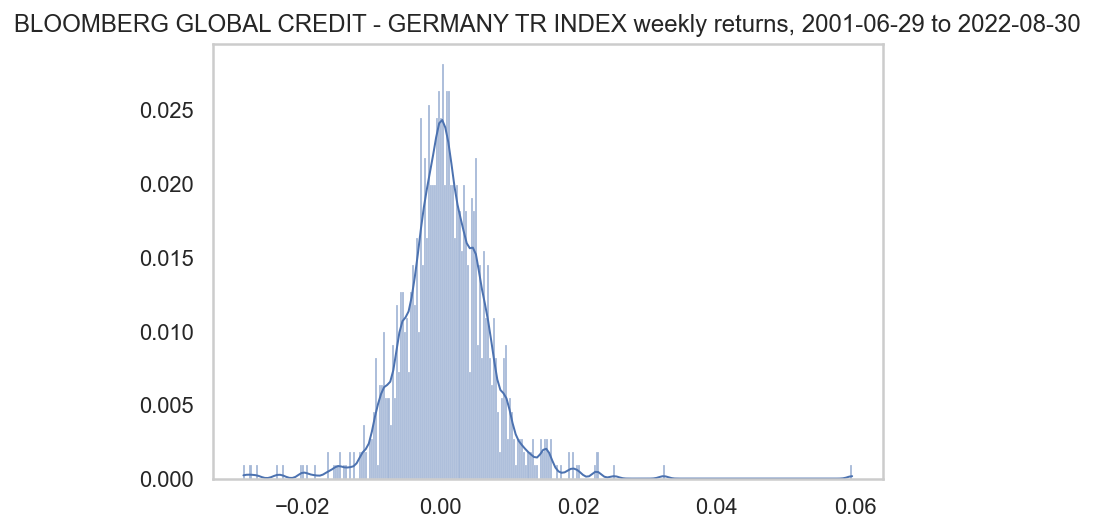

In [22]:
""" German price returns histogram """
fig, axs = plot_utils.histogram_plot(ger_tr)

# plt.savefig('bsc_plots/hist_kde_gertr_returns_01_22.eps', dpi=600)
# Todo: compare to normal dist, derive kurtosis etc

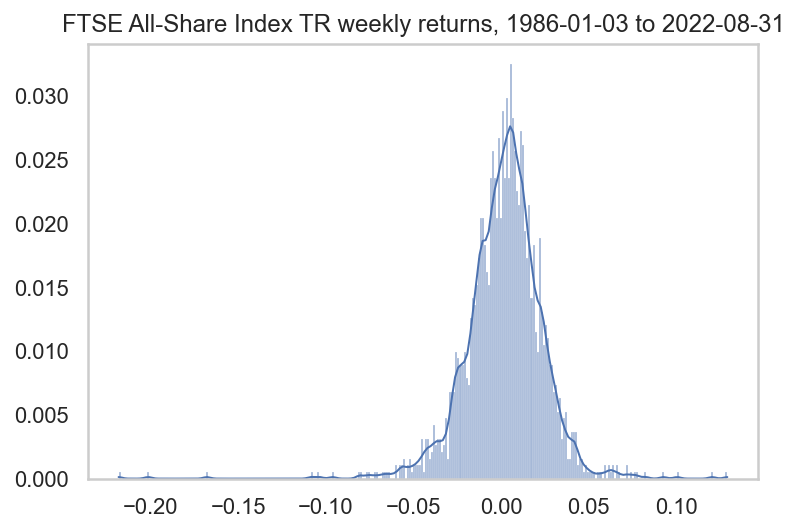

In [23]:
""" UK price returns histogram """
fig, axs = plot_utils.histogram_plot(ftse_tr)

# plt.savefig('bsc_plots/hist_kde_ftsetr_returns_86_22.eps', dpi=600)


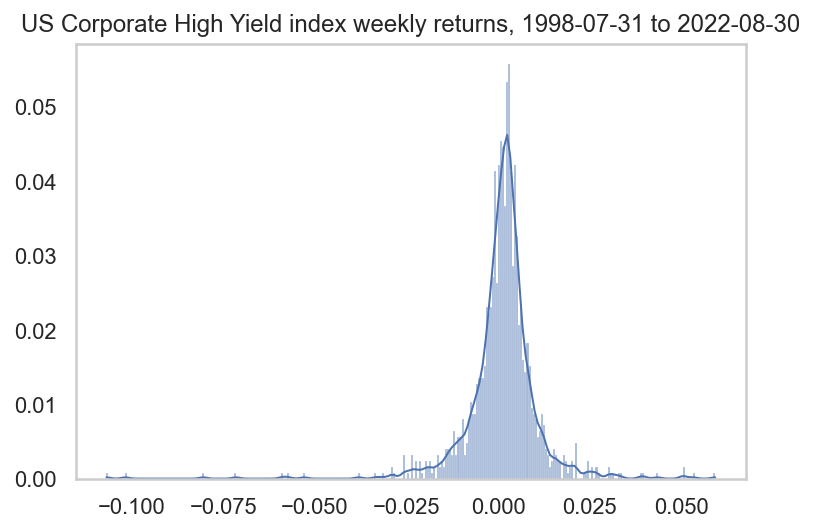

In [24]:
""" US price returns histogram """
fig, axs = plot_utils.histogram_plot(us_corp_high)

# plt.savefig('bsc_plots/hist_kde_usig_returns_88_22.eps', dpi=600)

<AxesSubplot:xlabel='return', ylabel='Density'>

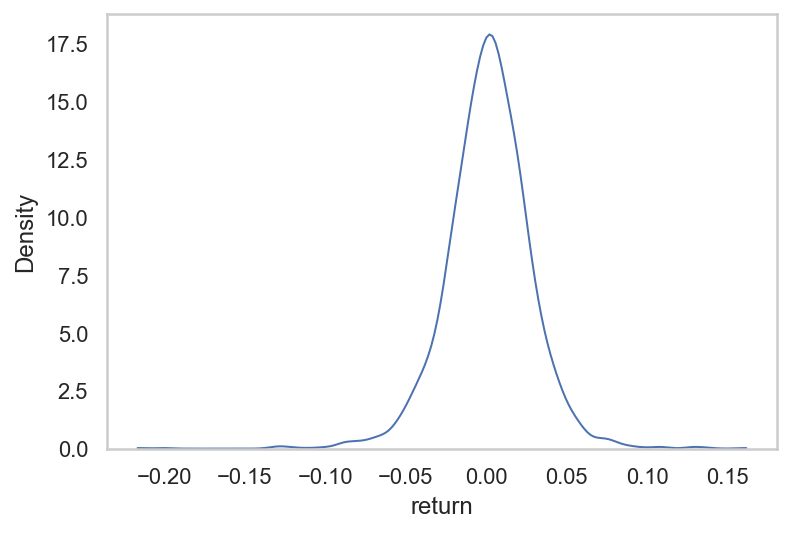

In [27]:

series1 = dax

returns = series1['last_price'].pct_change(periods=1)
returns = pd.DataFrame(returns)
returns['date'] = series1['date']
# returns = returns[returns['date'] > '1970-06-29']
# returns = returns[returns['date'] < '1997-06-29']

returns = returns.rename(columns={'last_price': 'return'})
# returns['log(return)'] = np.log(returns['return'])


sns.kdeplot(data=returns, x="return", linewidth=1, cut=0.10)